In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 12
EPOCHS=10

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/kriti/Downloads/Apple_Disease",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6342 files belonging to 4 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(12, 256, 256, 3)
[3 3 3 3 0 3 3 3 2 1 2 3]


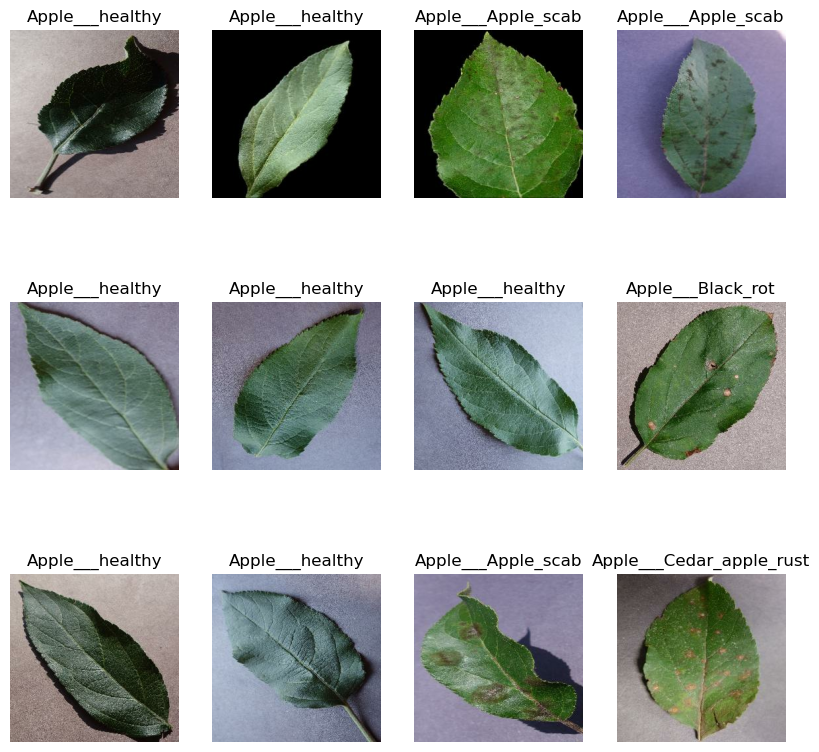

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

529

In [ ]:
train_size = 0.8
len(dataset)*train_size

423.20000000000005

In [ ]:
train_ds = dataset.take(423)
len(train_ds)

423

In [ ]:
test_ds = dataset.skip(423)
len(test_ds)

106

In [ ]:
val_size = 0.1
len(dataset)*val_size

52.900000000000006

In [ ]:
val_ds = test_ds.take(52)
len(val_ds)

52

In [ ]:
test_ds = test_ds.skip(52)
len(test_ds)

54

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split* ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
BATCH_SIZE = 12
IMAGE_SIZE = 256
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (12, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (12, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (12, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (12, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (12, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (12, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
423/423 [==============================] - 423s 943ms/step - loss: 1.0915 - accuracy: 0.5991 - val_loss: 0.7182 - val_accuracy: 0.6987
Epoch 2/10
423/423 [==============================] - 382s 903ms/step - loss: 0.7344 - accuracy: 0.7102 - val_loss: 0.8005 - val_accuracy: 0.7019
Epoch 3/10
423/423 [==============================] - 372s 879ms/step - loss: 0.5817 - accuracy: 0.7843 - val_loss: 0.4157 - val_accuracy: 0.8558
Epoch 4/10
423/423 [==============================] - 372s 879ms/step - loss: 0.4652 - accuracy: 0.8363 - val_loss: 0.3192 - val_accuracy: 0.8878
Epoch 5/10
423/423 [==============================] - 372s 879ms/step - loss: 0.3326 - accuracy: 0.8763 - val_loss: 0.2198 - val_accuracy: 0.9199
Epoch 6/10
423/423 [==============================] - 3137s 7s/step - loss: 0.2520 - accuracy: 0.9037 - val_loss: 0.3827 - val_accuracy: 0.8878
Epoch 7/10
423/423 [==============================] - 370s 874ms/step - loss: 0.1968 - accuracy: 0.9301 - val_loss: 0.2358 - v

In [ ]:
scores = model.evaluate(test_ds)

52/52 [==============================] - 31s 225ms/step - loss: 0.1118 - accuracy: 0.9647


In [ ]:
scores

[0.11177236586809158, 0.9647436141967773]

In [ ]:
history

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

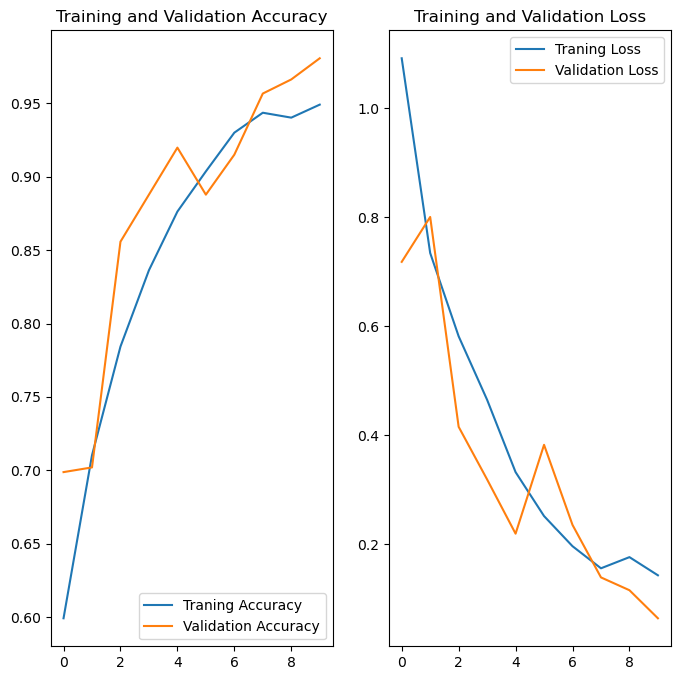

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Traning Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Traning Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Apple___Apple_scab
1/1 [==============================] - 0s 266ms/step
predicted label: Apple___Apple_scab


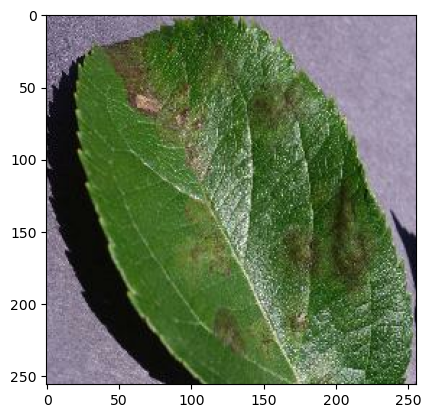

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 95ms/step


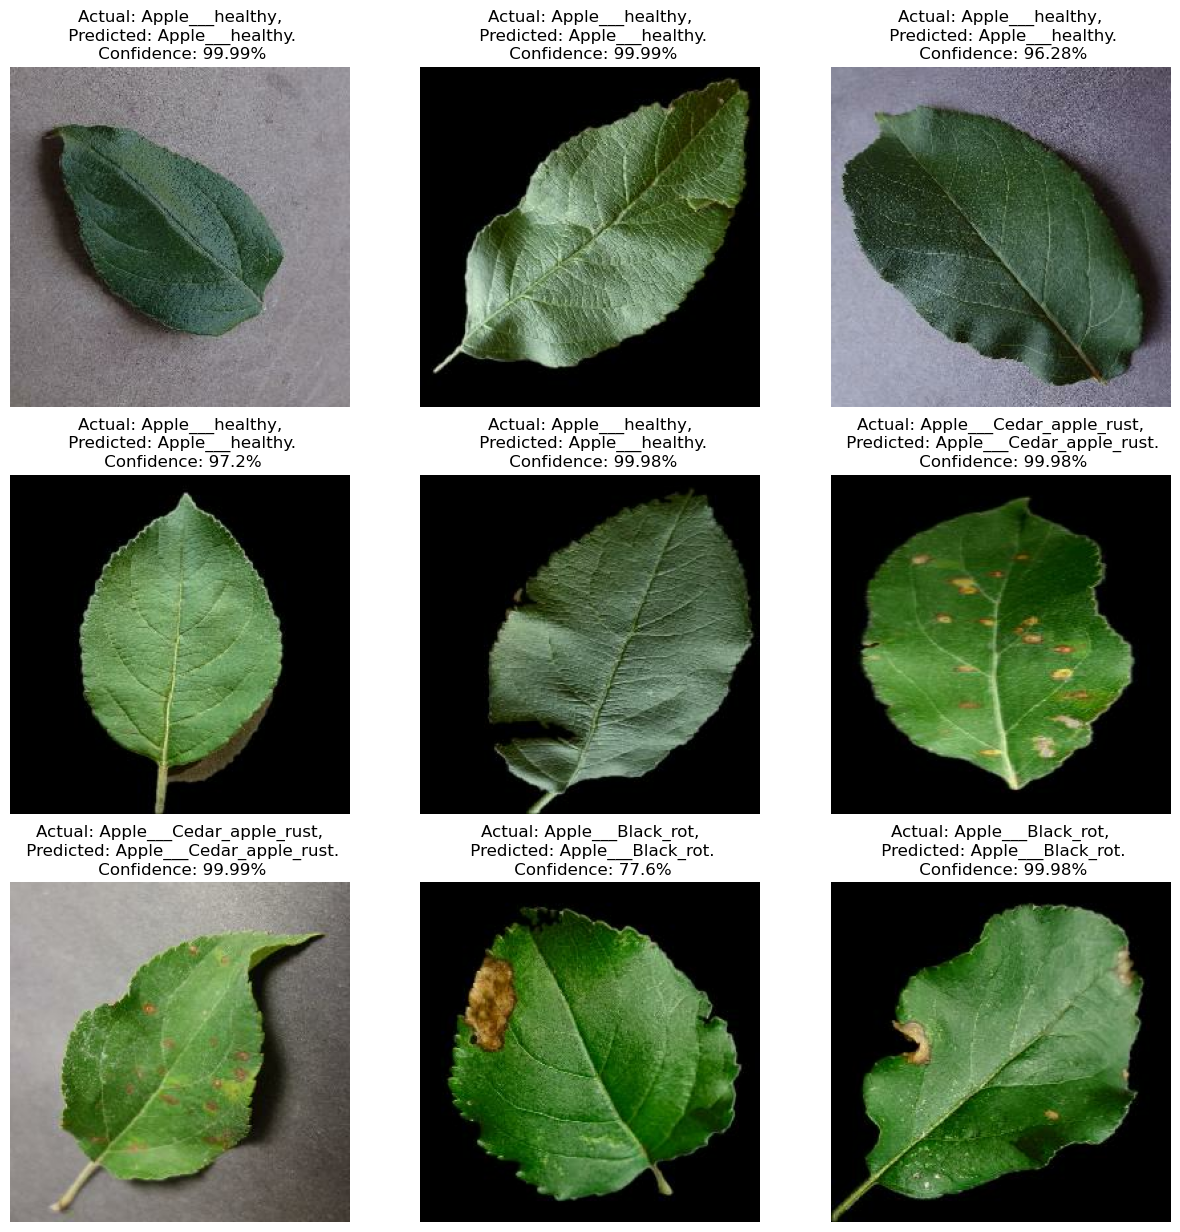

In [ ]:
plt.figure(figsize =(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")